#  Shallow networks with Keras on CIFAR10
Modify the example given in the class on the MNIST dataset to train and evaluate a shallow
networks on the CIFAR10 dataset. The CIFAR10 dataset is composed of 60’000 images equally
spread into 10 classes, i.e. with 6’000 images per class. The Figure 3 illustrates some images
for each classes. Each images are 32 × 32 pixels with RGB channels. A single image can then
be stored in a numpy array of shape 32 × 32 × 3 . Use the loader provided in TensorFlow that
will split the set into 50’000 images for training and 10’000 images for testing.


## check for tensorflow version

In [2]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


## loading the data

In [3]:
from tensorflow.keras.datasets import cifar10

# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Number of training samples: ", X_train.shape[0])
print("Number of test samples: ", X_test.shape[0])

Number of training samples:  50000
Number of test samples:  10000


## labels


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
labels = ["airplane",
         "automobile",
         "bird",
         "cat",
         "deer",
         "dog",
         "frog",
         "horse",
         "ship",
         "truck"]

print("The 10 classes are: ", labels)

The 10 classes are:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## inspect the data 

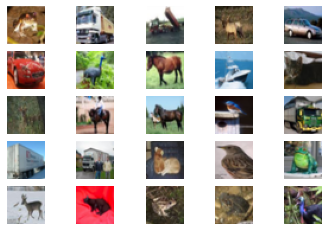

In [14]:
import matplotlib.pyplot as plt

def show_imgs(X):
  plt.figure(1)
  k = 0
  
  for i in range(0,5):
    for j in range(0,5):
      plt.subplot2grid((5,5),(i,j))
      plt.imshow(X[k], cmap='gray')
      k = k+1
      plt.axis('off')
  
  plt.show()

show_imgs(X_train)

## preprocess the data

In [15]:
print("Training set dimension: ", X_train.shape)
print("Test set dimension: ", X_test.shape)

Training set dimension:  (50000, 32, 32, 3)
Test set dimension:  (10000, 32, 32, 3)


In [16]:
X_train.shape[0]

50000

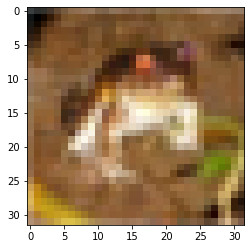

In [17]:
plt.imshow(X_train[0,:,:,:])
plt.show()

In [19]:
import numpy as np

# WTF?! xD That should be a frog... ^^
labels[np.argmax(y_train[0])]

'airplane'

In [20]:
X_train.dtype

dtype('float32')

In [21]:
# normalize the input
#
# TODO:
# Pay attention that here, the normalization of the weight values
# to 0-256 values should be done on a per-channel basis (RGB). 
X_train = X_train.astype('float32')
X_train /= 255.0
X_test = X_test.astype('float32')
X_test /= 255.0

## One-layer network and weight visualisation
Train a simple 1-layer dense network using the following parameters : 5 epochs, batch size =
128, L2 regularizer (value of 0.05), softmax activation, categorical-crossentropy loss and
adam optimizer. Report on the performance on the test set.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_classes = len(labels)
epochs = 5
batches = 128

model = Sequential(name='one_layer_network')

model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(Dense(n_classes,
                input_shape = X_train[0].shape,
                activation = 'softmax'))

model.summary()

Model: "one_layer_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 10)        40        
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network

In [26]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log = model.fit(X_train,
                y_train,
                batch_size=batches,
               epochs=epochs,
               validation_data=(X_test, y_test))

Epoch 1/5


ValueError: in user code:

    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/patrickk/anaconda3/envs/tf38/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 32, 32, 10) are incompatible
